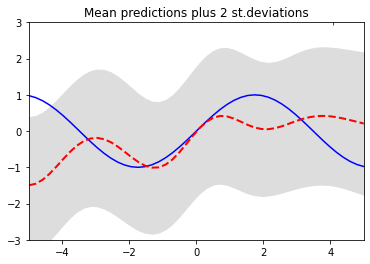

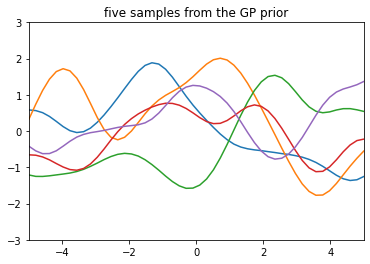

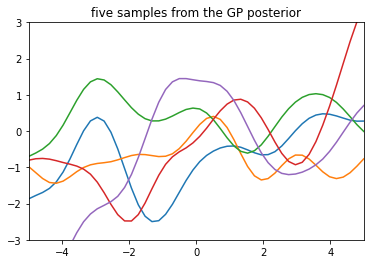

In [1]:
import numpy as np
import matplotlib.pyplot as pl

""" 
A code to illustrate the workings of GP regression in 1d. 
    We assume a zero mean GP Prior 
"""


# This is the true unknown, one-dimensional function we are trying to approximate
f = lambda x: np.sin(0.9*x).flatten()


# This is the kernel function
def kernel_function(a, b):
    """ GP squared exponential kernel function """
    kernelParameter = 1.0
    sqdist = np.sum(a**2,1).reshape(-1,1) + np.sum(b**2,1) - 2*np.dot(a, b.T)
    return np.exp(-.5 * (1/kernelParameter) * sqdist)


# Here we run the test
N = 10         # number of training points.
n = 50         # number of test points.
s = 0.0001    # noise variance.

# Sample some input points and noisy versions of the function evaluated at
# these points. 
X = np.random.uniform(-5, 5, size=(N,1))
y = f(X) + s*np.random.randn(N)  #add some noise

K = kernel_function(X, X)
L = np.linalg.cholesky(K + s*np.eye(N))

# points we're going to make predictions at.
TestPoint = np.linspace(-5, 5, n).reshape(-1,1)

# compute the mean at our test points.
Lk = np.linalg.solve(L, kernel_function(X, TestPoint))
mu = np.dot(Lk.T, np.linalg.solve(L, y))

# compute the variance at our test points.
K_ = kernel_function(TestPoint, TestPoint)
s2 = np.diag(K_) - np.sum(Lk**2, axis=0)
s =  np.sqrt(s2)


# PLOTS:
pl.figure(1)
pl.clf()
pl.plot(X, y, 'r+', ms=20)
pl.plot(TestPoint, f(TestPoint), 'b-')
pl.gca().fill_between(TestPoint.flat, mu-2*s, mu+2*s, color="#dddddd")
pl.plot(TestPoint, mu, 'r--', lw=2)
pl.savefig('draw_prediction.png', bbox_inches='tight')
pl.title('Mean predictions plus 2 st.deviations')
pl.axis([-5, 5, -3, 3])

# draw samples from the prior at our test points.
L = np.linalg.cholesky(K_ + 1e-6*np.eye(n))
f_prior = np.dot(L, np.random.normal(size=(n,5)))
pl.figure(2)
pl.clf()
pl.plot(TestPoint, f_prior)
pl.title('five samples from the GP prior')
pl.axis([-5, 5, -3, 3])
pl.savefig('sample_prior.png', bbox_inches='tight')

# draw samples from the posterior at our test points.
L = np.linalg.cholesky(K_ + 1e-6*np.eye(n) - np.dot(Lk.T, Lk))
f_post = mu.reshape(-1,1) + np.dot(L, np.random.normal(size=(n,5)))
pl.figure(3)
pl.clf()
pl.plot(TestPoint, f_post)
pl.title('five samples from the GP posterior')
pl.axis([-5, 5, -3, 3])
pl.savefig('sample_posterior.png', bbox_inches='tight')

pl.show()
